In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Implement me
# Set working directory
abspath = '/content/drive/My Drive/Colab Notebooks/NLP/NLP-Final-Project/NLP Project'

Mounted at /content/drive


In [2]:
import os
os.chdir(abspath)
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/NLP/NLP-Final-Project/NLP Project'

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import dateutil.parser

In [4]:
# dictionary of text dates and links (May 2020 to August 2020)

# May 1, 2020
url1 = 'https://www.reuters.com/article/us-health-coronavirus-amazon-com-idUSKBN22D4TK'

# May 4, 2020 
url2 = 'https://www.reuters.com/article/us-health-coronavirus-amazon-france-ware-idUSKBN22G2FE'

# May 7, 2020

url3 = 'https://www.reuters.com/article/us-health-coronavirus-nasdaq-graphic/stay-at-home-stocks-amazon-microsoft-lift-nasdaq-into-gain-for-2020-idUSKBN22J2YU'

# May 13, 2020
url4 = 'https://www.reuters.com/article/us-amazon-fire-idUSKBN22P29N'

# May 21, 2020

url5 = 'https://www.reuters.com/article/us-amazon-com-prime-day-idUSKBN22X1PE'

# May 26, 2020
url6 = 'https://www.reuters.com/article/us-zoox-m-a-amazon-com-idUSKBN23302F'


# May 28, 2020
url7 = 'https://www.reuters.com/article/us-health-coronavirus-amazon-com-workers-idUSKBN2341FD'

# June 3, 2020
url8 = 'https://in.reuters.com/article/us-health-coronavirus-amazon-com-lawsuit/amazon-is-sued-over-warehouses-after-new-york-worker-brings-coronavirus-home-cousin-dies-idINKBN23A3FI'

# June 17, 2020
url9 = 'https://www.reuters.com/article/us-amazon-com-saudi-arabia-idUSKBN23O3AO'

# June 23, 2020
url10 = 'https://www.reuters.com/article/us-amazon-com-clean-energy-idUSKBN23U1OP'

# June 26, 2020
url11 = 'https://www.reuters.com/article/us-zoox-m-a-amazon-com-idUSKBN23X0PI'

# June 28, 2020
url12 = 'https://www.reuters.com/article/us-amazon-germany-strike-idUSKBN23Z0RC'

# July 8, 2020
url13 = 'https://www.reuters.com/article/us-amazon-com-india-idUSKBN2490U9'

#July 10, 2020
url14 = 'https://www.reuters.com/article/us-amazon-com-delivery-idUSKBN24B2EJ'

# July 15, 2020
url15 = 'https://www.reuters.com/article/us-health-coronavirus-amazon-com-workers-idUSKCN24G2TM'

# July 23, 2020
url16 = 'https://www.reuters.com/article/us-reliance-amazon-com-stake-idUSKCN24O1BP'

# July 30, 2020
url17 = 'https://www.reuters.com/article/us-amazon-com-results-idUSKCN24V3HL'

# August 4, 2020
url18 = 'https://www.reuters.com/article/us-amazon-com-sweden-idUSKCN2501OA'

# August 14, 2020
url19 ='https://www.reuters.com/article/us-amazon-com-liability/california-court-rules-amazon-is-liable-for-injuries-from-defective-products-idUKKCN259327'

# August 17, 2020
url20 = 'https://www.reuters.com/article/amazoncom-rackspace-tech-idUSL1N2FG1JC'

# August 28, 2020
url21 = 'https://www.reuters.com/article/us-amazon-com-daimler-electric-vehicles-idUSKBN25O0TC'



url_dict = {'2020-05-01':url1,
            '2020-05-04':url2,
            '2020-05-07':url3,
            '2020-05-13':url4,
            '2020-05-21':url5,
            '2020-05-26':url6,
            '2020-05-28':url7,
            '2020-06-03':url8,
            '2020-06-17':url9,
            '2020-06-23':url10,
            '2020-06-26':url11,
            '2020-06-28':url12,
            '2020-07-08':url13,
            '2020-07-10':url14,
            '2020-07-15':url15,
            '2020-07-23':url16,
            '2020-07-30':url17,
            '2020-08-04':url18,
            '2020-08-14':url19,
            '2020-08-17':url20,
            '2020-08-28':url21,
           }


In [5]:
# extract info from each website and store it in dataframe
df_text = pd.DataFrame(columns = ['Date','Header','Text'])
header = []
text = []
date = []
for key in url_dict:
    page = requests.get(url_dict[key]).text
    soup = BeautifulSoup(page, 'html.parser')
    date.append(datetime.strptime(key, '%Y-%m-%d').date())
    url_header = soup.find('h1').text
    header.append(url_header)
    url_text = soup.find('div', class_ ='ArticleBodyWrapper')
    url_text = url_text.text
    text.append(url_text)
df_text['Date']=date
df_text['Header']=header
df_text['Text']=text

# remove the author and "min read" sections
df_text_temp = [] 
for text in df_text['Text']:
    loc = text.find('(Reuters)')
    df_text_temp.append(text[loc+9:])
df_text['Text'] = df_text_temp




In [6]:
df_text['Date'] = df_text['Date'].apply(lambda x: pd.to_datetime(x))
df_text.head()

,Date,Header,Text
0,2020-05-01,Amazon extends work from home regime till Octo...,- Amazon.com Inc has told staff whose job can...
1,2020-05-04,Amazon plans to extend closure of French wareh...,- Amazon AMZN.O plans to extend the closure o...
2,2020-05-07,"Stay-at-home stocks Amazon, Microsoft lift Nas...",- The Nasdaq .IXIC was on track to end Thursd...
3,2020-05-13,Amazon launches three new models of Fire tablet,- Amazon.com Inc on Wednesday launched three ...
4,2020-05-21,Amazon pushes Prime Day to September as it ret...,- Amazon.com Inc is scheduling its annual Pri...


In [7]:
# import stock data of netflix
df_stock = pd.read_csv('AMZN.csv', header=0)

df_stock['Date']=df_stock['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))


df_stock = df_stock.drop(['High','Low','Close','Adj Close'], axis=1)
df_stock.head()

,Date,Open,Volume
0,2019-11-29,1817.780029,1923400
1,2019-12-02,1804.400024,3925600
2,2019-12-03,1760.000000,3380900
3,2019-12-04,1774.010010,2670100
4,2019-12-05,1763.500000,2823800


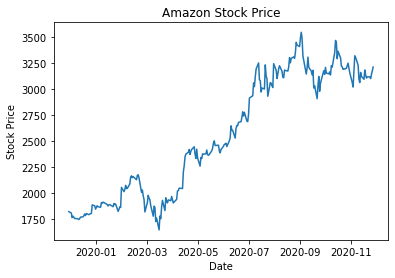

In [8]:
plt.figure()
plt.plot(df_stock['Date'], df_stock['Open'])
plt.title('Amazon Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [9]:
# Merge two dataframes
df = pd.merge(df_text, df_stock, how='inner', on='Date')
df = df.sort_values('Date')

In [10]:
# show % change in stock price after news article publish
pct_stock = df['Open'].pct_change()*100
df['% Change in Stock Price'] = pct_stock
pct_volume = df['Volume'].pct_change()*100
df['% Change in Volume'] = pct_volume
df.head()

,Date,Header,Text,Open,Volume,% Change in Stock Price,% Change in Volume
0,2020-05-01,Amazon extends work from home regime till Octo...,- Amazon.com Inc has told staff whose job can...,2336.800049,9772600,NaN,NaN
1,2020-05-04,Amazon plans to extend closure of French wareh...,- Amazon AMZN.O plans to extend the closure o...,2256.379883,4865900,-3.441465,-50.208747
2,2020-05-07,"Stay-at-home stocks Amazon, Microsoft lift Nas...",- The Nasdaq .IXIC was on track to end Thursd...,2374.780029,3396400,5.247350,-30.199963
3,2020-05-13,Amazon launches three new models of Fire tablet,- Amazon.com Inc on Wednesday launched three ...,2366.800049,4782900,-0.336030,40.822636
4,2020-05-21,Amazon pushes Prime Day to September as it ret...,- Amazon.com Inc is scheduling its annual Pri...,2500.000000,5114400,5.627850,6.930941


# Processing the text


## import spacy libraries
import spacy
import en_core_web_sm
from  spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load('en_core_web_sm')

In [11]:
# import spacy libraries
import spacy
import en_core_web_sm
from  spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load('en_core_web_sm')

In [12]:

text_nlp = nlp(df['Text'][1]) 
# Remove stop words
text_nlp_clean = [word for word in text_nlp if word.is_stop == False]
# Lemmatize words
text_nlp_clean = [word.lemma_ for word in text_nlp_clean]

In [13]:
text_clean = []
for ind, row in df.iterrows():
    
    # lower casing
    text_lower = row['Text'].lower()
    
    # tokenization
    text_nlp = nlp(row['Text']) 
    
    # remove punctuation and empty space
    text_nlp_clean = [word for word in text_nlp if not word.is_punct | word.is_space]
    
    # Remove stop words
    text_nlp_clean = [word for word in text_nlp_clean if word.is_stop == False]
    
    # Lemmatize tokens
    text_nlp_clean = [word.lemma_ for word in text_nlp_clean]
    
    # add preprocessed text to list
    text_clean.append(text_nlp_clean)

# turn list of strings to string
to_string = []
for text in text_clean:
    to_string.append(' '.join(text))


df['Text (clean)'] = to_string
df.head()

,Date,Header,Text,Open,Volume,% Change in Stock Price,% Change in Volume,Text (clean)
0,2020-05-01,Amazon extends work from home regime till Octo...,- Amazon.com Inc has told staff whose job can...,2336.800049,9772600,NaN,NaN,Amazon.com Inc tell staff job home October 2 p...
1,2020-05-04,Amazon plans to extend closure of French wareh...,- Amazon AMZN.O plans to extend the closure o...,2256.379883,4865900,-3.441465,-50.208747,Amazon AMZN.O plan extend closure french wareh...
2,2020-05-07,"Stay-at-home stocks Amazon, Microsoft lift Nas...",- The Nasdaq .IXIC was on track to end Thursd...,2374.780029,3396400,5.247350,-30.199963,Nasdaq .IXIC track end Thursday positive terri...
3,2020-05-13,Amazon launches three new models of Fire tablet,- Amazon.com Inc on Wednesday launched three ...,2366.800049,4782900,-0.336030,40.822636,Amazon.com Inc Wednesday launch new version Fi...
4,2020-05-21,Amazon pushes Prime Day to September as it ret...,- Amazon.com Inc is scheduling its annual Pri...,2500.000000,5114400,5.627850,6.930941,Amazon.com Inc schedule annual Prime Day shopp...


# Using a Pretrained Model 

In [14]:
from nltk.sentiment import SentimentIntensityAnalyzer

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [55]:
# a function to return sentiment score
def polarity_score(text):
    sid = SentimentIntensityAnalyzer()
    return sid.polarity_scores(text)['compound']

vader_score = []
for text in df['Text (clean)']:
    score = polarity_score(text)
    vader_score.append(score)

df['Vader Sentiment Score'] = vader_score

In [17]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [18]:
df.head()

,Date,Header,Text,Open,Volume,% Change in Stock Price,% Change in Volume,Text (clean)
0,2020-05-01,Amazon extends work from home regime till Octo...,- Amazon.com Inc has told staff whose job can...,2336.800049,9772600,NaN,NaN,Amazon.com Inc tell staff job home October 2 p...
1,2020-05-04,Amazon plans to extend closure of French wareh...,- Amazon AMZN.O plans to extend the closure o...,2256.379883,4865900,-3.441465,-50.208747,Amazon AMZN.O plan extend closure french wareh...
2,2020-05-07,"Stay-at-home stocks Amazon, Microsoft lift Nas...",- The Nasdaq .IXIC was on track to end Thursd...,2374.780029,3396400,5.247350,-30.199963,Nasdaq .IXIC track end Thursday positive terri...
3,2020-05-13,Amazon launches three new models of Fire tablet,- Amazon.com Inc on Wednesday launched three ...,2366.800049,4782900,-0.336030,40.822636,Amazon.com Inc Wednesday launch new version Fi...
4,2020-05-21,Amazon pushes Prime Day to September as it ret...,- Amazon.com Inc is scheduling its annual Pri...,2500.000000,5114400,5.627850,6.930941,Amazon.com Inc schedule annual Prime Day shopp...


## Sentiment Analysis

In [19]:
# run this cell to import nltk
import nltk
from os import getcwd
import numpy as np
import pandas as pd
from nltk.corpus import twitter_samples 
from utils import process_tweet, build_freqs

In [20]:
nltk.download('twitter_samples')
nltk.download('stopwords')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:

# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [22]:
# split the data into two pieces (80-20), one for training and one for testing (validation set)  
test_pos = all_positive_tweets[4000:]
train_pos = all_positive_tweets[:4000]
test_neg = all_negative_tweets[4000:]
train_neg = all_negative_tweets[:4000]

train_x = train_pos + train_neg 
test_x = test_pos + test_neg

In [23]:
# combine positive and negative labels
train_y = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
test_y = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)

In [24]:
# Print the shape train and test sets
print("train_y.shape = " + str(train_y.shape))
print("test_y.shape = " + str(test_y.shape))

train_y.shape = (8000, 1)
test_y.shape = (2000, 1)


In [25]:
# create frequency dictionary
freqs = build_freqs(train_x, train_y)

# check the output
print("type(freqs) = " + str(type(freqs)))
print("len(freqs) = " + str(len(freqs.keys())))

type(freqs) = <class 'dict'>
len(freqs) = 11346


In [26]:
# UNQ_C3 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def extract_features(tweet, freqs):
    '''
    Input: 
        tweet: a list of words for one tweet
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
    Output: 
        x: a feature vector of dimension (1,3)
    '''
    # process_tweet tokenizes, stems, and removes stopwords
    word_l = process_tweet(tweet)
    
    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3)) 
    
    #bias term is set to 1
    x[0,0] = 1 
    
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    
    # loop through each word in the list of words
    for word in word_l:
        
        # increment the word count for the positive label 1
        
        x[0,1] += freqs.get((word,1),0)
        
        # increment the word count for the negative label 0
        x[0,2] += freqs.get((word,0),0)
        
    ### END CODE HERE ###
    assert(x.shape == (1, 3))
    return x

In [27]:
# collect the features 'x' and stack them into a matrix 'X'
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i], freqs)

# training labels corresponding to X
Y = train_y

In [28]:
Y.shape

(8000, 1)

### SVM Parameters

In [29]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X, Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:

# UNQ_C4 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def predict_tweet(tweet, freqs):
    '''
    Input: 
        tweet: a string
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
        theta: (3,1) vector of weights
    Output: 
        y_pred: the probability of a tweet being positive or negative
    '''
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    
    # extract the features of the tweet and store it into x
    x = extract_features(tweet,freqs)
    
    # make the prediction using x and theta
    y_pred = classifier.predict(x)
    
    ### END CODE HERE ###
    
    return y_pred

In [31]:
# UNQ_C4 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def predict_tweet_prob(tweet, freqs):
    '''
    Input: 
        tweet: a string
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
        theta: (3,1) vector of weights
    Output: 
        y_pred: the probability of a tweet being positive or negative
    '''
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    
    # extract the features of the tweet and store it into x
    x = extract_features(tweet,freqs)
    
    # make the prediction using x and theta
    y_pred = classifier.predict_proba(x)
    
    ### END CODE HERE ###
    
    return y_pred

In [32]:

my_tweet = 'The plot was terrible and I was sad until the ending!'
predict_tweet(my_tweet, freqs)

array([0.])

# Testing the Model 

In [33]:
sentiment = []
sentiment_prob = []
for i in df.iloc[:,2]:
    sentiment.append(predict_tweet(i, freqs)[0])
    sentiment_prob.append(predict_tweet_prob(i, freqs)[0][1])

In [34]:
sentiment


[0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0]

In [35]:
sentiment_prob

[0.25804326022755447,
 0.32850271044649537,
 0.010366360924670139,
 0.949713226688723,
 0.8518240291461417,
 0.3155995805626222,
 0.06560427449831914,
 0.3705348630562624,
 0.15971400346318324,
 0.6531147154563587,
 0.2353831557858418,
 0.4443183507961508,
 0.9973852830386877,
 0.6818324259998693,
 0.2190173656490471,
 0.054232669883757585,
 0.3939907509281621,
 0.5347329990695121,
 0.05505932450813271,
 0.4996992722906314]

In [36]:
df['sentiment'] = sentiment
df['sentiment_prob'] = sentiment_prob

#DEEP LEARNING

In [37]:
import sklearn
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', -1)
import sklearn
import sklearn.ensemble
from sklearn.metrics import accuracy_score, confusion_matrix
import sklearn.metrics
import tensorflow as tf
from scipy.special import softmax
import os
import numpy as np
import pandas as pd
import json
import torch
import torch.nn as nn
import nltk
from tqdm import tqdm
import spacy
import torch
import torchtext
import torchtext.data
import torch.nn as nn
import torch.nn.functional as F
from scipy.special import softmax
from torchtext.vocab import Vocab
from nltk.corpus import twitter_samples 

nlp = spacy.load('en')
nltk.download('punkt')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [38]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(42)
np.random.seed(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [39]:
# %% ----------------------------------- Hyper Parameters --------------------------------------------------------------
class Args:
    def __init__(self):
        self.seq_len = "get_max_from_data"
        self.embedding_dim = 50
        self.n_epochs = 10
        self.lr = 1e-2
        self.batch_size = 512
        self.train = True
        self.save_model = True


args = Args()

In [49]:
# %% ----------------------------------- Helper Functions --------------------------------------------------------------
def acc(x, y, return_labels=False):
    with torch.no_grad():
        logits = torch.empty(len(x), 2)
        for batch in range(len(x) // args.batch_size + 1):
            inds = slice(batch * args.batch_size, (batch + 1) * args.batch_size)
            logits[inds] = model(x[inds])
        pred_labels = np.argmax(logits.cpu().numpy(), axis=1)
    if return_labels:
        return pred_labels
    else:
        return 100*accuracy_score(y.cpu().numpy(), pred_labels)


def extract_vocab_dict_and_msl(sentences_train, sentences_dev):
    """ Tokenizes all the sentences and gets a dictionary of unique tokens and also the maximum sequence length """
    tokens, ms_len = [], 0
    for sentence in list(sentences_train) + list(sentences_dev):
        tokens_in_sentence = nltk.word_tokenize(sentence)
        if ms_len < len(tokens_in_sentence):
            ms_len = len(tokens_in_sentence)
        tokens += tokens_in_sentence
    token_vocab = {key: i for key, i in zip(set(tokens), range(1, len(set(tokens))+1))}
    if len(np.unique(list(token_vocab.values()))) != len(token_vocab):
        "There are some rep words..."
    return token_vocab, ms_len


def convert_to_ids(raw_sentences, vocab_dict, pad_to):
    """ Takes an NumPy array of raw text sentences and converts to a sequence of token ids """
    x = np.empty((len(raw_sentences), pad_to))
    for idx, sentence in enumerate(raw_sentences):
        word_ids = []
        for token in nltk.word_tokenize(sentence):

            if token not in vocab_dict.keys():
              continue 
            try:
                word_ids.append(vocab_dict[token])
            except:
                word_ids.append(vocab_dict[token])
        if pad_to < len(word_ids):
            x[idx] = word_ids[:pad_to]
        else:
            x[idx] = word_ids + [0] * (pad_to - len(word_ids))
    return x


def get_glove_embeddings(vocab_dict):
    with open("glove.6B.50d.txt", "r") as s:
        glove = s.read()
    embeddings_dict = {}
    for line in glove.split("\n")[:-1]:
        text = line.split()
        if text[0] in vocab_dict:
            embeddings_dict[vocab_dict[text[0]]] = torch.from_numpy(np.array(text[1:], dtype="float32"))
    return embeddings_dict


def get_glove_table(vocab_dict, glove_dict):
    lookup_table = torch.empty((len(vocab_dict)+2, 50))
    for token_id in sorted(vocab_dict.values()):
        if token_id in glove_dict:
            lookup_table[token_id] = glove_dict[token_id]
        else:
            lookup_table[token_id] = torch.zeros((1, 50))  # For unknown tokens
    lookup_table[0] = torch.zeros((1, 50))
    return lookup_table



In [42]:
data_train = pd.read_csv("original_data/train.tsv", sep="\t")
x_train_raw, y_train = data_train["sentence"].values, torch.LongTensor(data_train["label"].values).to(device)
data_dev = pd.read_csv("original_data/dev.tsv", sep="\t")
x_dev_raw, y_dev = data_dev["sentence"].values, torch.LongTensor(data_dev["label"].values).to(device)


In [43]:
# %% -------------------------------------- Data Prep ------------------------------------------------------------------
try:
    with open("example_prep_data/vocab_dict.json", "r") as s:
        token_ids = json.load(s)
    msl = np.load("example_prep_data/max_sequence_length.npy").item()
except:
    print("Tokenizing all the examples to get a vocab dict and the maximum sequence length...")
    token_ids, msl = extract_vocab_dict_and_msl(x_train_raw, x_dev_raw)
    os.mkdir("example_prep_data")
    with open("example_prep_data/vocab_dict.json", "w") as s:
        json.dump(token_ids, s)
    np.save("example_prep_data/max_sequence_length.npy", np.array([msl]))
if args.seq_len == "get_max_from_data":
    args.seq_len = msl

glove_embeddings = get_glove_embeddings(token_ids)

try:
    x_train = np.load("example_prep_data/prep_train_len{}.npy".format(args.seq_len))
    x_dev = np.load("example_prep_data/prep_dev_len{}.npy".format(args.seq_len))
except:
    print("Converting all the sentences to sequences of token ids...")
    x_train = convert_to_ids(x_train_raw, token_ids, args.seq_len)
    np.save("example_prep_data/prep_train_len{}.npy".format(args.seq_len), x_train)
    x_dev = convert_to_ids(x_dev_raw, token_ids, args.seq_len)
    np.save("example_prep_data/prep_dev_len{}.npy".format(args.seq_len), x_dev)




In [44]:
x_train, x_dev = torch.LongTensor(x_train).to(device), torch.LongTensor(x_dev).to(device)

In [45]:
# %% -------------------------------------- CNN Class ------------------------------------------------------------------
class CNN(nn.Module):
    def __init__(self, vocab_size):
        super(CNN, self).__init__()

        self.embedding = nn.Embedding(vocab_size + 2, args.embedding_dim)

        self.conv1 = nn.Conv1d(args.embedding_dim, args.embedding_dim, 9)
        self.convnorm1 = nn.BatchNorm1d(args.embedding_dim)
        self.pool1 = nn.MaxPool1d(2)

        self.conv2 = nn.Conv1d(args.embedding_dim, args.embedding_dim, 9)
        self.convnorm2 = nn.BatchNorm1d(args.embedding_dim)
        self.pool2 = nn.MaxPool1d(2)

        self.conv3 = nn.Conv1d(args.embedding_dim, args.embedding_dim, 7)
        self.linear = nn.Linear(args.embedding_dim, 2)
        self.act = torch.relu

    def forward(self, x):
        # nn.Conv1d operates on the columns, each embedding dimension is considered as one channel
        x = self.embedding(x).permute(0, 2, 1)
        x = self.pool1(self.convnorm1(self.act(self.conv1(x))))
        x = self.pool2(self.convnorm2(self.act(self.conv2(x))))
        return self.linear(self.act(self.conv3(x)).reshape(-1, args.embedding_dim))



In [46]:
# %% -------------------------------------- Training Prep ----------------------------------------------------------
model = CNN(len(token_ids)).to(device)
look_up_table = get_glove_table(token_ids, glove_embeddings)
model.embedding.weight.data.copy_(look_up_table)
optimizer = torch.optim.Adam(model.parameters(), lr=args.lr)
criterion = nn.CrossEntropyLoss()

In [47]:
# %% -------------------------------------- Training Loop ----------------------------------------------------------
labels_ditrib = torch.unique(y_dev, return_counts=True)
print("The no information rate is {:.2f}".format(100*labels_ditrib[1].max().item()/len(y_dev)))
if args.train:
    acc_dev_best = 0
    print("Starting training loop...")
    for epoch in range(args.n_epochs):

        loss_train, train_steps = 0, 0
        model.train()
        total = len(x_train) // args.batch_size + 1  # Initiates a progress bar that will be updated for each batch
        with tqdm(total=total, desc="Epoch {}".format(epoch)) as pbar:  # "Epoch" will be updated for each epoch
            for batch in range(len(x_train)//args.batch_size + 1):
                inds = slice(batch*args.batch_size, (batch+1)*args.batch_size)
                optimizer.zero_grad()
                logits = model(x_train[inds])
                loss = criterion(logits, y_train[inds])
                loss.backward()
                optimizer.step()
                loss_train += loss.item()
                train_steps += 1
                pbar.update(1)  # Updates the progress and the training loss
                pbar.set_postfix_str("Training Loss: {:.5f}".format(loss_train / train_steps))

        model.eval()
        with torch.no_grad():
            y_dev_pred = model(x_dev)
            loss = criterion(y_dev_pred, y_dev)
            loss_test = loss.item()

        acc_dev = acc(x_dev, y_dev)
        print("Epoch {} | Train Loss {:.5f}, Train Acc {:.2f} - Test Loss {:.5f}, Test Acc {:.2f}".format(
            epoch, loss_train/train_steps, acc(x_train, y_train), loss_test, acc_dev))

        if acc_dev > acc_dev_best and args.save_model:
            torch.save(model.state_dict(), "cnn_sentiment.pt")
            print("The model has been saved!")
            acc_dev_best = acc_dev

Epoch 0:   0%|          | 0/132 [00:00<?, ?it/s]

The no information rate is 50.92
Starting training loop...


Epoch 0: 100%|██████████| 132/132 [00:01<00:00, 75.00it/s, Training Loss: 0.33921]


Epoch 0 | Train Loss 0.33921, Train Acc 93.69 - Test Loss 0.59996, Test Acc 80.16


Epoch 1:  14%|█▎        | 18/132 [00:00<00:01, 92.80it/s, Training Loss: 0.20336]

The model has been saved!


Epoch 2:  13%|█▎        | 17/132 [00:00<00:01, 87.48it/s, Training Loss: 0.12803]

Epoch 1 | Train Loss 0.16086, Train Acc 96.42 - Test Loss 0.55414, Test Acc 79.36


Epoch 3:  12%|█▏        | 16/132 [00:00<00:01, 99.27it/s, Training Loss: 0.09309]

Epoch 2 | Train Loss 0.10881, Train Acc 97.16 - Test Loss 0.70020, Test Acc 80.28
The model has been saved!


Epoch 4:  11%|█▏        | 15/132 [00:00<00:01, 93.74it/s, Training Loss: 0.06848]

Epoch 3 | Train Loss 0.08009, Train Acc 98.15 - Test Loss 0.70682, Test Acc 80.50
The model has been saved!


Epoch 5:  14%|█▎        | 18/132 [00:00<00:01, 93.81it/s, Training Loss: 0.05758]

Epoch 4 | Train Loss 0.06147, Train Acc 97.36 - Test Loss 0.89981, Test Acc 80.28


Epoch 6:  12%|█▏        | 16/132 [00:00<00:01, 94.52it/s, Training Loss: 0.04486]

Epoch 5 | Train Loss 0.05121, Train Acc 98.36 - Test Loss 0.83008, Test Acc 81.54
The model has been saved!


Epoch 7:  14%|█▎        | 18/132 [00:00<00:01, 96.19it/s, Training Loss: 0.03890]

Epoch 6 | Train Loss 0.04240, Train Acc 98.44 - Test Loss 1.28971, Test Acc 80.85


Epoch 8:  14%|█▎        | 18/132 [00:00<00:01, 89.89it/s, Training Loss: 0.03588]

Epoch 7 | Train Loss 0.03465, Train Acc 98.37 - Test Loss 1.45630, Test Acc 77.75


Epoch 9:  13%|█▎        | 17/132 [00:00<00:01, 91.59it/s, Training Loss: 0.02849]

Epoch 8 | Train Loss 0.02927, Train Acc 99.21 - Test Loss 1.05540, Test Acc 78.78


Epoch 9: 100%|██████████| 132/132 [00:01<00:00, 89.80it/s, Training Loss: 0.02349]


Epoch 9 | Train Loss 0.02349, Train Acc 99.27 - Test Loss 1.33796, Test Acc 78.56


In [50]:

x = None
deep_learning_sentiment_prob = []

for i in df.iloc[:,7]:


  test = convert_to_ids([i.lower()], token_ids, args.seq_len)


  test = torch.LongTensor(test).to(device)
  pred = model(test).cpu().detach().numpy()[0]
  print(pred)

  x = softmax(pred)
  deep_learning_sentiment_prob.append(x[1])

[-2.2429192  1.7361491]
[16.512531 -7.698343]
[12.921294  -5.0160604]
[ 4.2279677 -1.4275753]
[ 18.663357 -10.019526]
[ 29.730017 -12.345085]
[12.761134 -6.014931]
[ 1.5417185  -0.34945145]
[ 2.2284656  -0.93702585]
[ 9.478932  -3.1194272]
[ 35.14708 -17.7271 ]
[ 6.388829  -2.4273598]
[14.705116  -6.7228394]
[10.342419  -3.7068872]
[ 7.16926  -2.196729]
[16.660418 -6.158477]
[ 30.24957  -15.086537]
[ 26.320581 -10.877504]
[11.490711  -4.0736713]
[ 20.645357 -11.054433]


In [52]:
df['deep_learning_sentiment_prob'] = deep_learning_sentiment_prob
df

,Date,Header,Text,Open,Volume,% Change in Stock Price,% Change in Volume,Text (clean),sentiment,sentiment_prob,deep_learning_sentiment_prob
0,2020-05-01,Amazon extends work from home regime till October 2,"- Amazon.com Inc has told staff whose job can be done from home that they can do so until at least Oct. 2, pushing out the timeline on a return to work for many employees as it faces scrutiny over conditions in its warehouses.“Employees who work in a role that can effectively be done from home are welcome to do so until at least October 2,” an Amazon spokesman said in an emailed statement on Friday, adding it was applicable to such roles globally.The statement did not specify how much of the company’s overall workforce that covered and which roles.It said the company is investing funds in safety measures for employees who wish to come to the office “through physical distancing, deep cleaning, temperature checks, and the availability of face coverings and hand sanitizer.”New York Attorney General Letitia James told Amazon last week it may have violated safety measures and labor practices amid the virus outbreak as the company fired a warehouse protest leader in March.Workers at warehouses and other facilities have stayed operational to keep deliveries flowing to customers stuck at home in government-mandated lockdowns.Other employees have been working from home since March.The company has raised overtime pay for warehouse workers and hired 175,000 people last month while rival brick-and-mortar retailers had to shut stores. It had 798,000 full and part-time workers globally as of Dec. 31.Reporting by Kanishka Singh and Aakriti Bhalla in Bengaluru; editing by Patrick GrahamOur Standards: The Thomson Reuters Trust Principles.",2336.800049,9772600,NaN,NaN,"Amazon.com Inc tell staff job home October 2 push timeline return work employee face scrutiny condition warehouse “employee work role effectively home welcome October 2 Amazon spokesman say email statement Friday add applicable role globally statement specify company overall workforce cover role say company invest fund safety measure employee wish come office physical distancing deep cleaning temperature check availability face covering hand sanitizer ”New York Attorney General Letitia James tell Amazon week violate safety measure labor practice amid virus outbreak company fire warehouse protest leader March worker warehouse facility stay operational delivery flow customer stick home government mandate lockdown employee work home March company raise overtime pay warehouse worker hire 175,000 people month rival brick mortar retailer shut store 798,000 time worker globally December 31.reporting Kanishka Singh Aakriti Bhalla Bengaluru editing Patrick GrahamOur Standards Thomson Reuters Trust Principles",0.0,0.258043,9.816403e-01
1,2020-05-04,Amazon plans to extend closure of French warehouses until May 8,"- Amazon AMZN.O plans to extend the closure of its French warehouses until May 8 included, the e-commerce giant said on Monday.The U.S. group’s six French warehouses have been closed since April 16 following court rulings that ordered it to restrict deliveries during the COVID-19 pandemic or face hefty fines.“Unfortunately, this means that we consider to temporarily suspend the activity at our French distribution centres until May 8 included,” Amazon said, adding that it was still reviewing how to operate within the frame of the ruling.Reporting by Mathieu RosemainOur Standards: The Thomson Reuters Trust Principles.",2256.379883,4865900,-3.441465,-50.208747,Amazon AMZN.O plan extend closure french warehouse 8 include e commerce giant say Monday U.S. group french warehouse close April 16 follow court ruling order restrict delivery covid-19 pandemic face hefty fine “Unfortunately mean consider temporarily suspend activity french distribution centre 8 include Amazon say add review operate frame ruling reporting Mathieu RosemainOur Standards Thomson Reuters Trust Principles,0.0,0.328

# Summary 

In [53]:
# Converting % stock price change to % stock price change per day
days = [0]
for i in range(len(df['Date'])):
    if i != 0:
        date_diff = df['Date'][i]-df['Date'][i-1]
        day = date_diff.days
        days.append(day)
print(days)
df['Days Elapsed'] = days
df.head()
df['% Change in Stock Price Per Day'] = df['% Change in Stock Price']/df['Days Elapsed']


[0, 3, 3, 6, 8, 5, 2, 6, 14, 6, 3, 12, 2, 5, 8, 7, 5, 10, 3, 11]


In [56]:
df['Vader Sentiment'] = df['Vader Sentiment Score'].apply(lambda x: "positive" if x>0 else "negative")
df['Logistic Regression Sentiment'] = df['sentiment_prob'].apply(lambda x: "positive" if x>0.5 else "negative")
df['Stock Price Change'] = df['% Change in Stock Price Per Day'].apply(lambda x: "positive" if x>0 else "negative")
df['deep_learning_sentiment_prob'] = df['deep_learning_sentiment_prob'].apply(lambda x: "positive" if x>0.5 else "negative")
df.head()

,Date,Header,Text,Open,Volume,% Change in Stock Price,% Change in Volume,Text (clean),sentiment,sentiment_prob,deep_learning_sentiment_prob,Days Elapsed,% Change in Stock Price Per Day,Vader Sentiment Score,Vader Sentiment,Logistic Regression Sentiment,Stock Price Change
0,2020-05-01,Amazon extends work from home regime till October 2,"- Amazon.com Inc has told staff whose job can be done from home that they can do so until at least Oct. 2, pushing out the timeline on a return to work for many employees as it faces scrutiny over conditions in its warehouses.“Employees who work in a role that can effectively be done from home are welcome to do so until at least October 2,” an Amazon spokesman said in an emailed statement on Friday, adding it was applicable to such roles globally.The statement did not specify how much of the company’s overall workforce that covered and which roles.It said the company is investing funds in safety measures for employees who wish to come to the office “through physical distancing, deep cleaning, temperature checks, and the availability of face coverings and hand sanitizer.”New York Attorney General Letitia James told Amazon last week it may have violated safety measures and labor practices amid the virus outbreak as the company fired a warehouse protest leader in March.Workers at warehouses and other facilities have stayed operational to keep deliveries flowing to customers stuck at home in government-mandated lockdowns.Other employees have been working from home since March.The company has raised overtime pay for warehouse workers and hired 175,000 people last month while rival brick-and-mortar retailers had to shut stores. It had 798,000 full and part-time workers globally as of Dec. 31.Reporting by Kanishka Singh and Aakriti Bhalla in Bengaluru; editing by Patrick GrahamOur Standards: The Thomson Reuters Trust Principles.",2336.800049,9772600,NaN,NaN,"Amazon.com Inc tell staff job home October 2 push timeline return work employee face scrutiny condition warehouse “employee work role effectively home welcome October 2 Amazon spokesman say email statement Friday add applicable role globally statement specify company overall workforce cover role say company invest fund safety measure employee wish come office physical distancing deep cleaning temperature check availability face covering hand sanitizer ”New York Attorney General Letitia James tell Amazon week violate safety measure labor practice amid virus outbreak company fire warehouse protest leader March worker warehouse facility stay operational delivery flow customer stick home government mandate lockdown employee work home March company raise overtime pay warehouse worker hire 175,000 people month rival brick mortar retailer shut store 798,000 time worker globally December 31.reporting Kanishka Singh Aakriti Bhalla Bengaluru editing Patrick GrahamOur Standards Thomson Reuters Trust Principles",0.0,0.258043,positive,0,NaN,0.9337,positive,negative,negative
1,2020-05-04,Amazon plans to extend closure of French warehouses until May 8,"- Amazon AMZN.O plans to extend the closure of its French warehouses until May 8 included, the e-commerce giant said on Monday.The U.S. group’s six French warehouses have been closed since April 16 following court rulings that ordered it to restrict deliveries during the COVID-19 pandemic or face hefty fines.“Unfortunately, this means that we consider to temporarily suspend the activity at our French distribution centres until May 8 included,” Amazon said, adding that it was still reviewing how to operate within the frame of the ruling.Reporting by Mathieu RosemainOur Standards: The Thomson Reuters Trust Principles.",2256.379883,4865900,-3.441465,-50.208747,Amazon AMZN.O plan extend closure french warehouse 8 include e commerce giant say Monday U.S. group french warehouse close April 16 follow court ruling order restrict delivery covid-19 pandemic face hefty fine “Unfortunately mean consider temporarily suspend act

In [57]:
columns = ['Date','Header','Stock Price Change', 'Vader Sentiment', 'Logistic Regression Sentiment','deep_learning_sentiment_prob']
df_summary = df[columns]
df_summary.head()

,Date,Header,Stock Price Change,Vader Sentiment,Logistic Regression Sentiment,deep_learning_sentiment_prob
0,2020-05-01,Amazon extends work from home regime till October 2,negative,positive,negative,positive
1,2020-05-04,Amazon plans to extend closure of French warehouses until May 8,negative,positive,negative,negative
2,2020-05-07,"Stay-at-home stocks Amazon, Microsoft lift Nasdaq into gain for 2020",positive,positive,negative,negative
3,2020-05-13,Amazon launches three new models of Fire tablet,negative,negative,positive,negative
4,2020-05-21,Amazon pushes Prime Day to September as it returns to normalcy: WSJ,positive,positive,positive,negative
